## Oscilador harmônico

### Considerando a EDO do oscilador harmônico: $\frac{d^2x}{dt^2}=-\omega_0^2x-b\frac{dx}{dt}$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

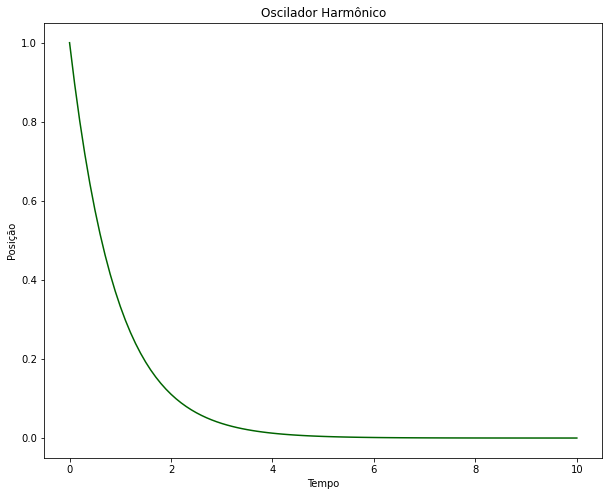

In [10]:
  def runge_kutta(f, t0, tn, y0, h):
      n = int((tn - t0) / h) + 1
      t = np.linspace(t0, tn, n)
      y = np.zeros_like(t)
      y[0] = y0
      
      for i in range(1, n):
          k1 = h * f(t[i-1], y[i-1])
          k2 = h * f(t[i-1] + h/2, y[i-1] + k1/2)
          k3 = h * f(t[i-1] + h/2, y[i-1] + k2/2)
          k4 = h * f(t[i-1] + h, y[i-1] + k3)
          
          y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
      
      return t, y
  
  def harmonic_oscillator(t, x):
      m = 1
      b = 0.1
      k = 1
      return -(b/m) * x - (k/m) * x
  
  t, x = runge_kutta(harmonic_oscillator, 0, 10, 1, 0.1)
  

  fig = plt.figure(figsize=(10, 8))
  plt.plot(t, x, color='darkgreen')
  plt.xlabel('Tempo')
  plt.ylabel('Posição')
  plt.title('Oscilador Harmônico')
  plt.grid(False)
  plt.show()